In [690]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

# Import and Explore Data

### 1. Import data

In [714]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [715]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [716]:
# Outlier detection 
def outliers(train,n,cols):
    outlier_index = []
    
    # iterate over features(columns)
    for col in cols:
        # 1st quartile (25%)
        Q1 = np.percentile(train[col], 1)
        # 3rd quartile (75%)
        Q99 = np.percentile(train[col],99)
        
        # Determine a list of indices of outliers for feature col
        outlier_list = train[(train[col] < Q1) | (train[col] > Q99)].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_index.extend(outlier_list)
    
    return outlier_index

# detect outliers from Age, SibSp , Parch and Fare
out = outliers(train,2,["Age","SibSp","Parch","Fare"])

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [717]:
print(out)

[159, 180, 201, 324, 792, 846, 863, 13, 25, 610, 638, 678, 885, 27, 88, 258, 311, 341, 438, 679, 737, 742]


In [718]:
#Check Outliers
train.loc[out]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S


We notice that most of the datas we intend to drop concern either a high SibSp or a high Fare.

In [719]:
#Drop outliers
train = train.drop(out, axis = 0).reset_index(drop=True)
train.shape

(869, 12)

In [720]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,869.000000,869.000000,869.000000,699.000000,869.000000,869.000000,869.000000
mean,445.948216,0.384350,2.311853,29.601102,0.451093,0.322209,28.634881
std,256.244314,0.486721,0.831749,14.568288,0.872765,0.671834,36.652825
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,225.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,447.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.858300
75%,666.000000,1.000000,3.000000,38.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,4.000000,247.520800


In [721]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [722]:
# As we will perform transformations on datas, we have to use the entire dataset to transform the test data too
df = train.append(test)

/Users/maelfabien/.local/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [723]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

### 2. Check missing values

In [724]:
test = test.fillna(np.nan)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          673
Embarked         2
dtype: int64

Age and Cabin have a high rate of missing values. We might want to drop those columns later. In the "df" dataset, the "Survived" column has many missing values since the survival tag is not present on the test set.

In [725]:
df.isnull().sum()

Age             256
Cabin          1000
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

### 3. Prepare data

The steps to be able to fully exploit the datas are :
- transform Sex into a categorical feature
- transform "Embarked" into a categorical feature
- try to exploit some information from the name (a status such as Mr, Mrs, Dr, Capt...
- fill-in missing values in the different columns
- drop columns which can't be used
- transform text inputs into numerical ones

In [726]:
# a. Sex into categorical feature
dict_sex = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(dict_sex)
test['Sex'] = test['Sex'].map(dict_sex)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [727]:
# b. Embarked into categorical feature
print(train['Embarked'].value_counts())

S    628
C    163
Q     76
Name: Embarked, dtype: int64


In [728]:
#Most part of the time, the Embarked tag is S. So by default, missing values should belong to S.
dummies_train = pd.get_dummies(train[["Embarked"]], prefix_sep='_') #Embarked
train = pd.concat([train, dummies_train], axis=1) 

dummies_test = pd.get_dummies(test[["Embarked"]], prefix_sep='_') #Embarked
test = pd.concat([test, dummies_test], axis=1) 

train["Embarked"]=train["Embarked"].fillna('S')
test["Embarked"]=test["Embarked"].fillna('S')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [729]:
# c. Exploit Name information
# An idea is to exploit the Title of the person as it might have been correlated to a certain cabin type and therefore a certain survival probability.

In [730]:
train["Title"] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False) #Using ReGex
test["Title"] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False) #Using ReGex

In [731]:
train['Title'].value_counts()

Mr          509
Miss        174
Mrs         120
Master       39
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Capt          1
Jonkheer      1
Countess      1
Ms            1
Sir           1
Lady          1
Mme           1
Name: Title, dtype: int64

Some grouping can be done here to allow to compare the titles

In [732]:
# Group common titles
#train["Title"] = train["Title"].replace('Master', 'Master')
train["Title"] = train["Title"].replace('Mlle', 'Miss')
train["Title"] = train["Title"].replace(['Mme', 'Dona', 'Ms'], 'Mrs')
train["Title"] = train["Title"].replace(['Don','Jonkheer'],'Mr')
train["Title"] = train["Title"].replace(['Capt','Rev','Major', 'Col','Dr'], 'Millitary')
train["Title"] = train["Title"].replace(['Lady', 'Countess','Sir'], 'Honor')

In [733]:
# And similarly on the test data
#train["Title"] = train["Title"].replace('Master', 'Master')
test["Title"] = test["Title"].replace('Mlle', 'Miss')
test["Title"] = test["Title"].replace(['Mme', 'Dona', 'Ms'], 'Mrs')
test["Title"] = test["Title"].replace(['Don','Jonkheer'],'Mr')
test["Title"] = test["Title"].replace(['Capt','Rev','Major', 'Col','Dr'], 'Millitary')
#test["Title"] = test["Title"].replace(['Lady', 'Countess','Sir'], 'Honor')

In [734]:
titledummies = pd.get_dummies(train[['Title']], prefix_sep='_') #Title
train = pd.concat([train, titledummies], axis=1) 

ttitledummies=pd.get_dummies(test[['Title']], prefix_sep='_') #Title
test = pd.concat([test, ttitledummies], axis=1) 

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_C,Embarked_Q,Embarked_S,Title,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,0,1,Mr,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,1,0,0,Mrs,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,Miss,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,0,0,1,Mrs,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,0,0,1,Mr,0,0,0,0,1,0


In [735]:
# d. Fill in the Fare missing Value and the Ages
train["Fare"]=train["Fare"].fillna(np.median(train["Fare"]))
test["Fare"]=test["Fare"].fillna(np.median(train["Fare"]))

In [737]:
#Group ages by title
titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Millitary','Honor']
for title in titles:
    age_to_impute = train.groupby('Title')['Age'].median()[title]
    train.loc[(train['Age'].isnull()) & (train['Title'] == title), 'Age'] = age_to_impute
    
titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Millitary']
for title in titles:    
    age_to_impute = test.groupby('Title')['Age'].median()[title]
    test.loc[(test['Age'].isnull()) & (test['Title'] == title), 'Age'] = age_to_impute

In [738]:
# e. Drop unused columns
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [739]:
# f. Finally, use the Ticket column and try to exploit it
train['Ticket'].value_counts()

1601               7
347088             6
CA 2144            5
S.O.C. 14879       5
3101295            5
347082             5
113760             4
349909             4
PC 17757           4
4133               4
382652             4
17421              4
113781             4
W./C. 6608         4
LINE               4
2666               4
C.A. 34651         3
248727             3
239853             3
110413             3
SC/Paris 2123      3
13502              3
29106              3
PC 17572           3
230080             3
C.A. 31921         3
363291             3
F.C.C. 13529       3
PC 17582           3
347077             3
                  ..
350406             1
345763             1
347069             1
312992             1
C 17369            1
PC 17759           1
SOTON/OQ 392089    1
218629             1
113767             1
334912             1
2648               1
2693               1
349228             1
3474               1
PC 17474           1
PC 17597           1
350025       

In [740]:
#There are too many ticket types, so I decided to drop the column.
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [741]:
# g. Transform strings into numerical values
from sklearn import preprocessing

def encode_features(train, test):
    features = ['Title','Embarked']
    
    df = pd.concat([train[features], test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        train[feature] = le.transform(train[feature])
        test[feature] = le.transform(test[feature])
    return train, test
    
train, test = encode_features(train, test)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Title,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,0,22.0,1,0,7.2500,2,0,0,1,4,0,0,0,0,1,0
1,2,1,1,1,38.0,1,0,71.2833,0,1,0,0,5,0,0,0,0,0,1
2,3,1,3,1,26.0,0,0,7.9250,2,0,0,1,3,0,0,0,1,0,0
3,4,1,1,1,35.0,1,0,53.1000,2,0,0,1,5,0,0,0,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,2,0,0,1,4,0,0,0,0,1,0


In [742]:
test.isnull().sum()

PassengerId        0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Title              0
Title_Master       0
Title_Millitary    0
Title_Miss         0
Title_Mr           0
Title_Mrs          0
dtype: int64

In [744]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title',
       'Title_Honor', 'Title_Master', 'Title_Millitary', 'Title_Miss',
       'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [ ]:
test.insert(12,"Title_Honor", 0)

In [748]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Title,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs
0,892,3,0,34.5,0,0,7.8292,1,0,1,0,4,0,0,0,0,1,0
1,893,3,1,47.0,1,0,7.0000,2,0,0,1,5,0,0,0,0,0,1
2,894,2,0,62.0,0,0,9.6875,1,0,1,0,4,0,0,0,0,1,0
3,895,3,0,27.0,0,0,8.6625,2,0,0,1,4,0,0,0,0,1,0
4,896,3,1,22.0,1,1,12.2875,2,0,0,1,5,0,0,0,0,0,1


### 4. Correlation 

In [329]:
#We will now focus on the covariance matrix of the data set
train.cov().style.background_gradient

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "6pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "10pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '400px'),
                        ('font-size', '10pt')])
]

train.cov().style.background_gradient(cmap='Reds', axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '0pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Title,Title_Honor,Title_Master,Title_Millitary,Title_Miss,Title_Mr,Title_Mrs
PassengerId,6.6e+04,-0.19,-8.7,-6.1,1.4e+02,-16,-0.8,1.6e+02,4.4,-0.69,-3,3.7,4,0.67,-1.1,2.1,-7.3,5.4,0.24
Survived,-0.19,0.24,-0.13,0.13,-0.52,0.00039,0.043,5,-0.059,0.029,0.00091,-0.032,-0.036,0.0021,0.0092,-0.0022,0.065,-0.14,0.061
Pclass,-8.7,-0.13,0.69,-0.054,-4,0.05,-0.0015,-19,0.097,-0.075,0.052,0.026,-0.039,-0.0045,0.014,-0.018,0.0013,0.058,-0.051
Sex,-6.1,0.13,-0.054,0.23,-0.69,0.052,0.077,3.9,-0.041,0.016,0.01,-0.027,0.014,0.0011,-0.016,-0.006,0.13,-0.2,0.092
Age,1.4e+02,-0.52,-4,-0.69,1.8e+02,-3.5,-2.4,60,-0.2,0.22,-0.25,-0.022,4.8,0.048,-1.1,0.36,-1.6,1.4,0.84
SibSp,-16,0.00039,0.05,0.052,-3.5,0.76,0.25,4.4,0.03,-0.014,-0.0015,0.017,-0.21,0.00075,0.077,-0.0024,0.019,-0.13,0.033
Parch,-0.8,0.043,-0.0015,0.077,-2.4,0.25,0.45,5,0.011,0.004,-0.019,0.016,-0.12,-0.0011,0.047,-0.0044,0.034,-0.12,0.045
Fare,1.6e+02,5,-19,3.9,60,4.4,5,1.3e+03,-6.3,3.9,-1.4,-2.6,-0.55,0.11,0.23,0.15,1.5,-4.3,2.4
Embarked,4.4,-0.059,0.097,-0.041,-0.2,0.03,0.011,-6.3,0.62,-0.29,-0.047,0.33,0.016,-0.003,0.0047,0.00038,-0.029,0.038,-0.011
Embarked_C,-0.69,0.029,-0.075,0.016,0.22,-0.014,0.004,3.9,-0.29,0.15,-0.016,-0.14,0.0082,0.0017,-0.0027,-0.00043,0.0046,-0.014,0.011


In [330]:
#Explore Highly correlated variables
corr_list = []
threshold = 0.2

for i in range(0, 7):
    for j in range(i+1, 7):
        if abs(train.corr().iloc[i,j])>= abs(threshold) :
            corr_list.append([train.corr().iloc[i,j],i,j])

In [331]:
#Print the highest correlated values
for v,i,j in sorted(corr_list,key= lambda x: -abs(x[0])):
    print("%s and %s = %.2f" % (train.columns[i], train.columns[j], v))

Survived and Sex = 0.55
SibSp and Parch = 0.43
Pclass and Age = -0.36
Survived and Pclass = -0.33
Age and SibSp = -0.30
Age and Parch = -0.27
Sex and Parch = 0.24


The most significant couples are pretty highly correlated. The Survival seems to highly depend on Sex and Pclass.

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


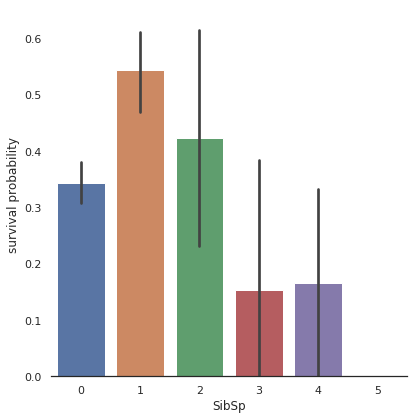

In [332]:
# Explore SibSp feature vs Survived
fig = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 6)
fig.despine(left=True)
fig = fig.set_ylabels("survival probability")

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


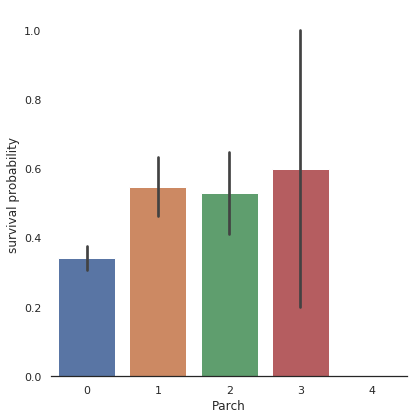

In [333]:
# Explore Parch feature vs Survived
fig  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 6)
fig.despine(left=True)
fig = fig.set_ylabels("survival probability")

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


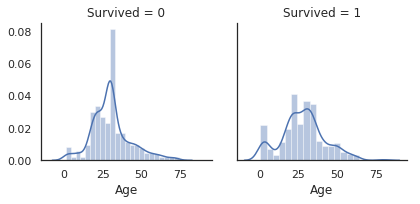

In [334]:
# Explore Age vs Survived
fig = sns.FacetGrid(train, col='Survived')
fig = fig.map(sns.distplot, "Age")

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


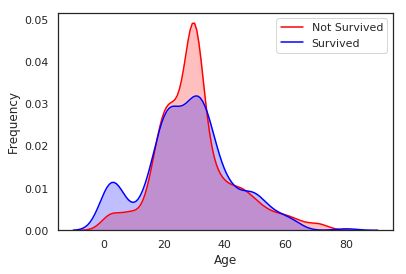

In [335]:
# Explore Age distibution 
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


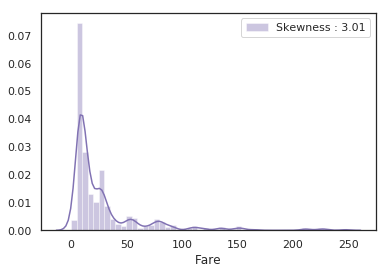

In [336]:
# Explore Fare distribution 
g = sns.distplot(train["Fare"], color="m", label="Skewness : %.2f"%(train["Fare"].skew()))
g = g.legend(loc="best")

In [337]:
# Apply log to Fare to reduce skewness distribution
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


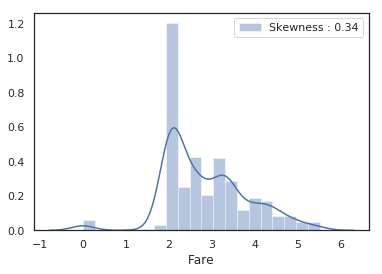

In [338]:
g = sns.distplot(train["Fare"], color="b", label="Skewness : %.2f"%(train["Fare"].skew()))
g = g.legend(loc="best")

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


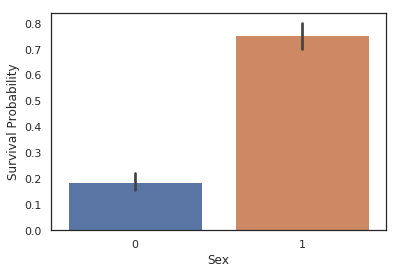

In [339]:
#Link between Sex and Survival
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")

In [340]:
#Average Survival probabilities by sex
train[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
0,0.188380
1,0.754153


In [341]:
# Explore Embarked vs Survived 
print(train[["Embarked_S", "Survived"]].groupby('Embarked_S').mean())
print(train[["Embarked_Q", "Survived"]].groupby('Embarked_Q').mean())
print(train[["Embarked_C", "Survived"]].groupby('Embarked_C').mean())

            Survived
Embarked_S          
0           0.497925
1           0.340764
            Survived
Embarked_Q          
0           0.383354
1           0.394737
            Survived
Embarked_C          
0           0.348442
1           0.539877


In [342]:
# Create a family size descriptor from SibSp and Parch
train["Fsize"] = train["SibSp"] + train["Parch"] + 1

In [751]:
test["Fsize"] = test["SibSp"] + test["Parch"] + 1

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


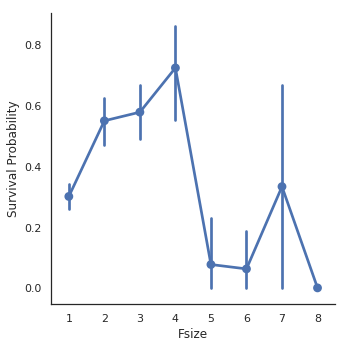

In [344]:
g = sns.factorplot(x="Fsize",y="Survived",data = train)
g = g.set_ylabels("Survival Probability")

In [345]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title',
       'Title_Honor', 'Title_Master', 'Title_Millitary', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Fsize'],
      dtype='object')

Finally, we can represent our datas on a pairplot :

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/

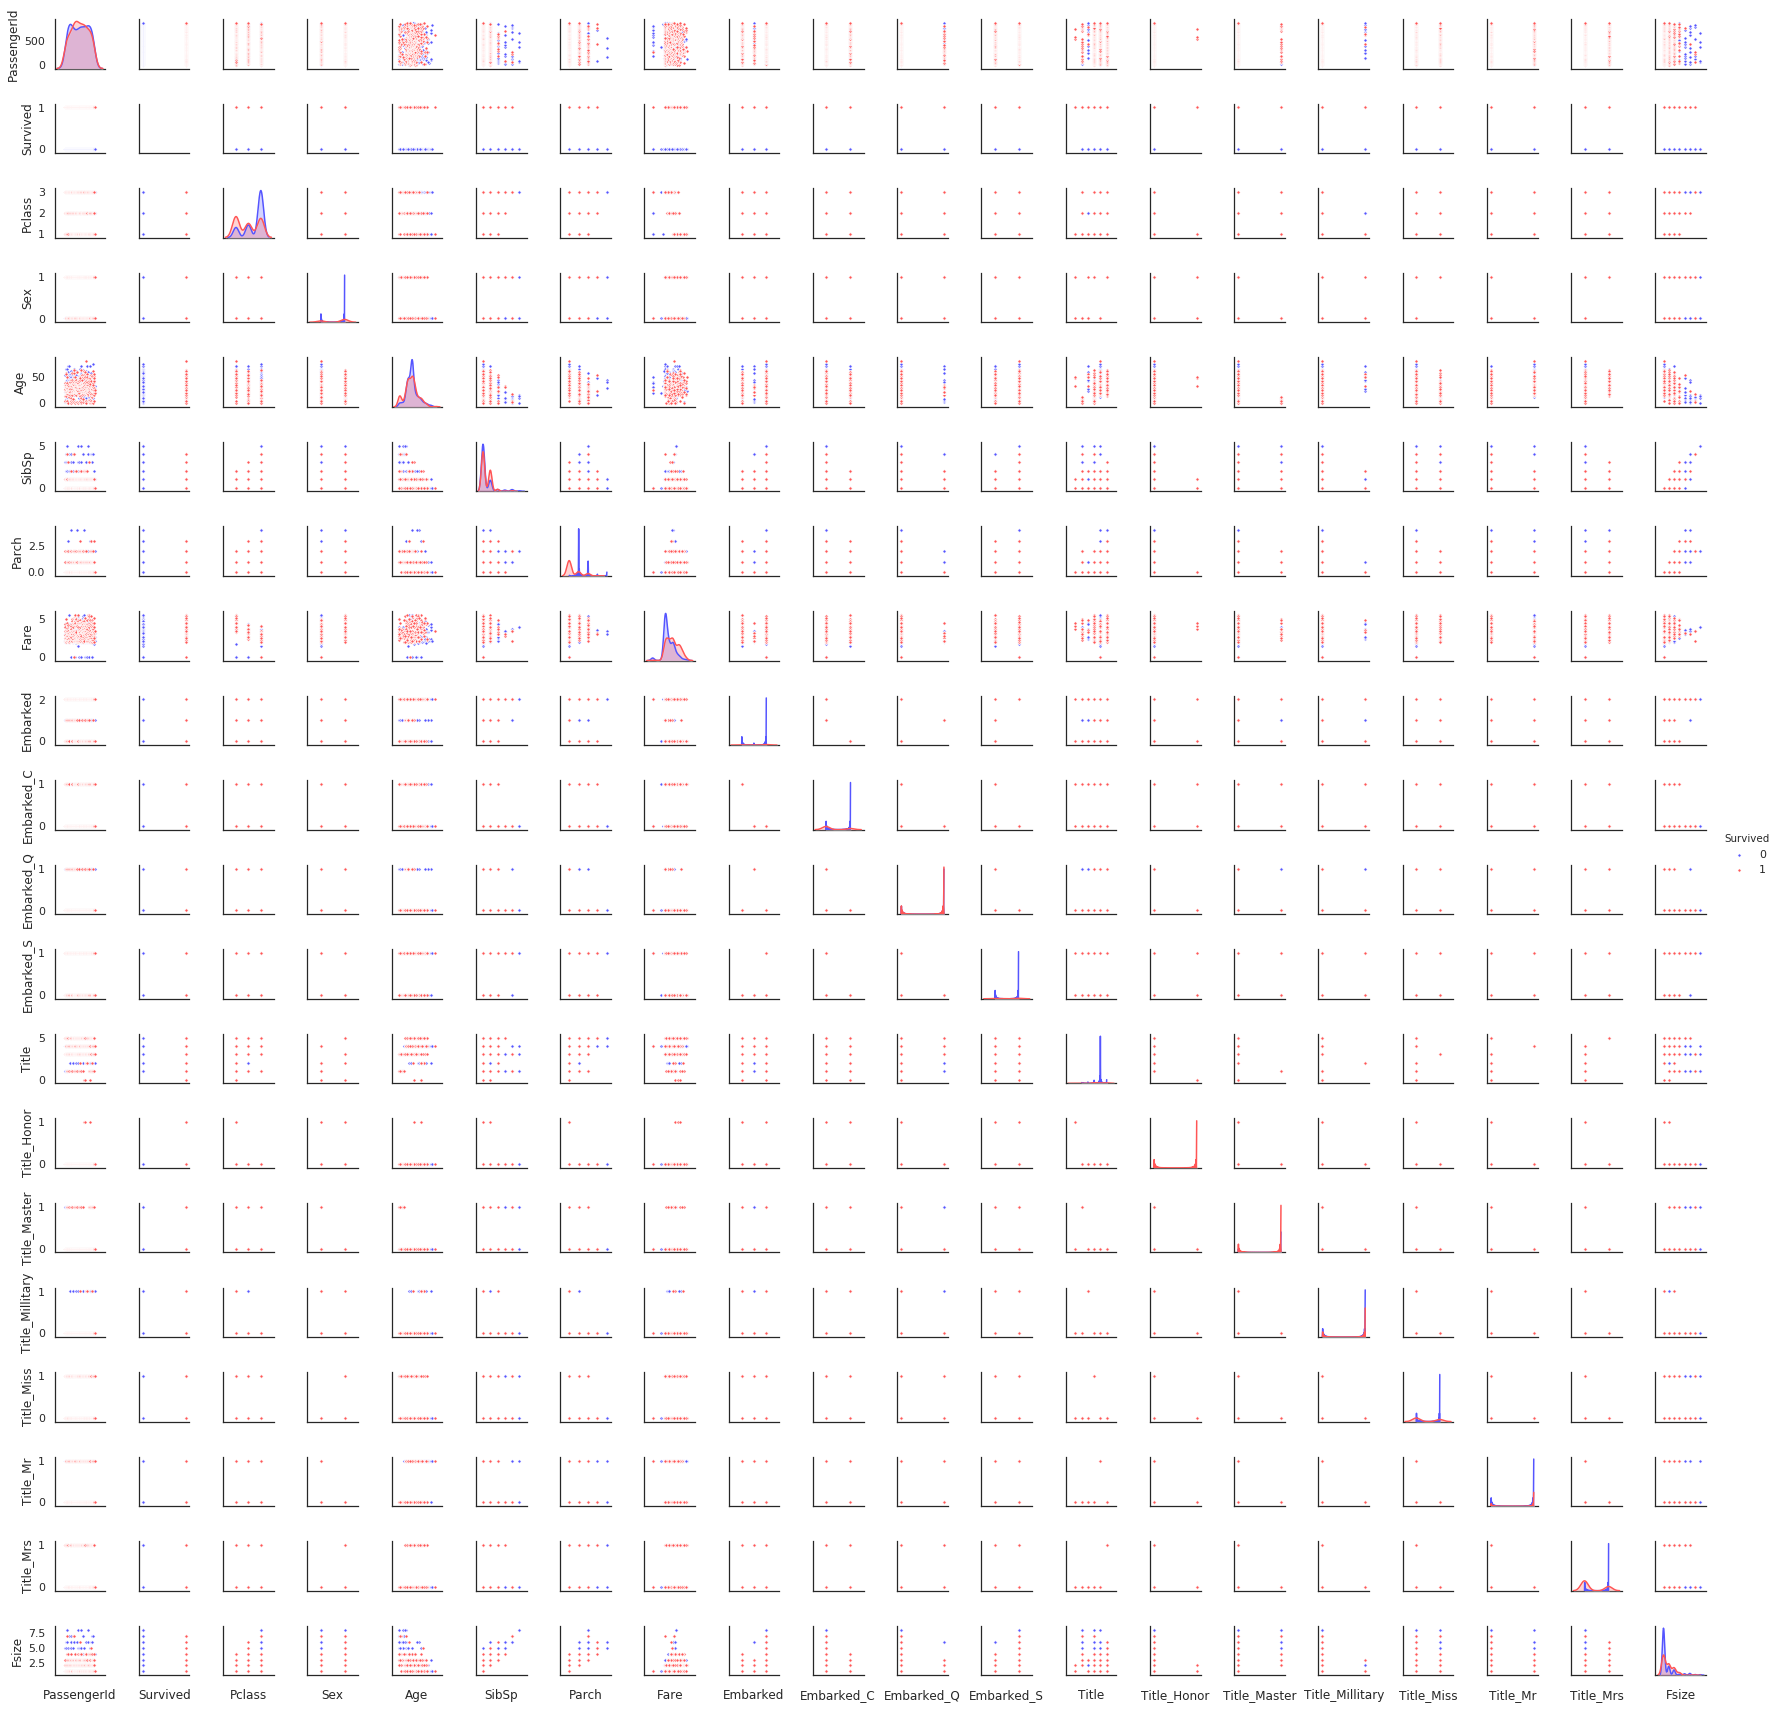

In [347]:
g = sns.pairplot(data=train, hue='Survived', palette = 'seismic', size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

### 5. Model

In [352]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 
X = train.drop("Survived",axis=1)
y = train["Survived"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [353]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((608, 19), (261, 19), (608,), (261,))

In [386]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22)

##### 1. Naive Bayes Classifier

Accuracy Model : 81.61% 


Text(0.5, 1.05, 'Confusion_matrix')

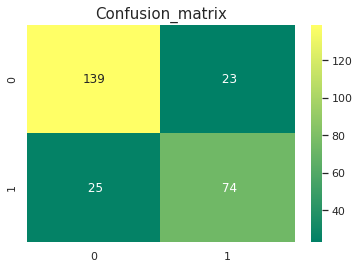

In [423]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
result_gnb = accuracy_score(y_test, y_pred_gnb)*100
print("Accuracy Model : %.2f%% " % result_gnb)

sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [566]:
# Parameter tuning

#param_gnb_gs = []
#result_gnb_gs = 0

## Search grid for optimal parameters

gnb_gs = GridSearchCV(gnb,param_grid = {}, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gnb_gs.fit(X_train,y_train)

# Best score
param_gnb_gs = gnb_gs.best_estimator_
result_gnb_gs = gnb_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gnb_gs))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Accuracy CV : 81.41% 


[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.1s finished


##### 2. Logistic Regression

Accuracy Model : 83.14% 


Text(0.5, 1.05, 'Confusion_matrix')

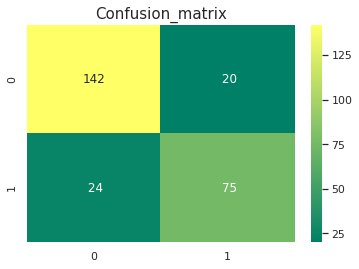

In [486]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# Train the model using the training sets and check score
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
result_lr = accuracy_score(y_test, y_pred_lr)*100
print("Accuracy Model : %.2f%% " % result_lr)

sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [554]:
# Parameter tuning

## Search grid for optimal parameters
lr_param_grid = {"tol": [0.000001, 0.00001, 0.0001, 0.001],
              "max_iter": [50, 100, 150, 200, 1000]}

lr_gs = GridSearchCV(lr,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
lr_gs.fit(X_train,y_train)

# Best score
param_lr_gs = lr_gs.best_estimator_
result_lr_gs = lr_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_lr_gs))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuracy CV : 82.40% 


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.5s finished


##### 3. Decision Tree Classifier

Accuracy Model : 70.11% 


Text(0.5, 1.05, 'Confusion_matrix')

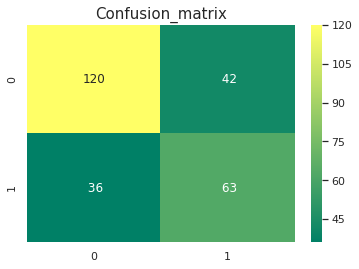

In [490]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
result_dt = accuracy_score(y_test, y_pred_dt)*100
print("Accuracy Model : %.2f%% " % result_dt)

sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [555]:
# Parameter tuning

## Search grid for optimal parameters
dt_param_grid = {"presort": [True, False]}

dt_gs = GridSearchCV(dt,param_grid = dt_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
dt_gs.fit(X_train,y_train)

# Best score
param_dt_gs = dt_gs.best_estimator_
result_dt_gs = dt_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_dt_gs))

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Accuracy CV : 73.68% 


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


##### 4. Random Forest Classifier

Accuracy Model : 81.23% 


Text(0.5, 1.05, 'Confusion_matrix')

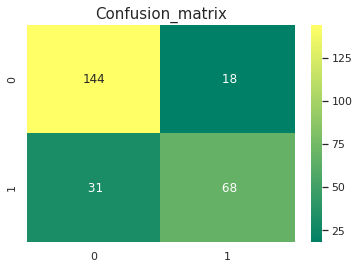

In [492]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=2, max_depth=100, n_estimators = 1000)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
result_rf = accuracy_score(y_test, y_pred_rf)*100
print("Accuracy Model : %.2f%% " % result_rf)

sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [556]:
# Parameter tuning

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

rf_gs = GridSearchCV(rf,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

rf_gs.fit(X_train,y_train)

# Best score
param_rf_gs = rf_gs.best_estimator_
result_rf_gs = rf_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_rf_gs))

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   26.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.4min finished


Accuracy CV : 84.70% 


##### 5. Extra Trees Classifier

Accuracy Model : 81.61% 


Text(0.5, 1.05, 'Confusion_matrix')

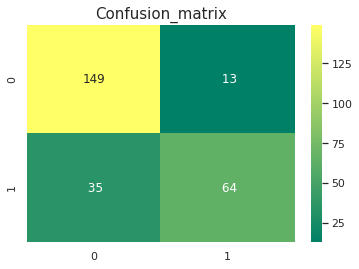

In [769]:
from sklearn import ensemble
from sklearn.ensemble import ExtraTreesClassifier

extc = ExtraTreesClassifier(n_estimators=1000,max_features= 19,criterion= 'entropy',min_samples_split= 5,max_depth= 100, min_samples_leaf= 30)      
extc.fit(X_train,y_train) 

y_pred_extc = extc.predict(X_test)
result_extc = accuracy_score(y_test, y_pred_extc)*100
print("Accuracy Model : %.2f%% " % result_extra)

sns.heatmap(confusion_matrix(y_test,y_pred_extra),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [557]:
# Parameter tuning

## Search grid for optimal parameters
extc_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


extc_gs = GridSearchCV(extc,param_grid = extc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

extc_gs.fit(X_train,y_train)

# Best score
param_extc_gs = extc_gs.best_estimator_
result_extc_gs = extc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_extc_gs))

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   56.3s
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  1.1min finished


Accuracy CV : 84.38% 


##### 6. K-Nearest-Neighbors

Accuracy Model : 59.00% 


Text(0.5, 1.05, 'Confusion_matrix')

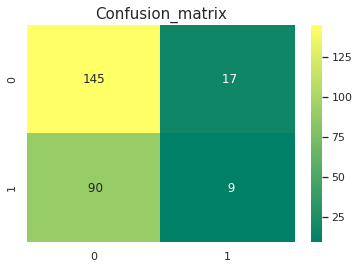

In [497]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)
result_knn = accuracy_score(y_test, y_pred_knn)*100
print("Accuracy Model : %.2f%% " % result_knn)

sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [558]:
# Parameter tuning

## Search grid for optimal parameters
knn_param_grid = {"n_neighbors": [2,4,5,7,9,11,14,17,20,25],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "weights": ['uniform', 'distance']}

knn_gs = GridSearchCV(knn,param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

knn_gs.fit(X_train,y_train)

# Best score
param_knn_gs = knn_gs.best_estimator_
result_knn_gs = knn_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_knn_gs))

Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=4)]: Done 716 tasks      | elapsed:    1.9s


Accuracy CV : 62.34% 


[Parallel(n_jobs=4)]: Done 1600 out of 1600 | elapsed:    4.7s finished


##### 7. Gradient Descent Classifier

Accuracy Model : 79.69% 


Text(0.5, 1.05, 'Confusion_matrix')

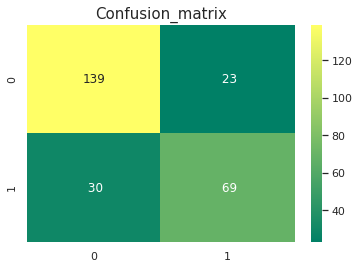

In [756]:
from sklearn.linear_model import SGDClassifier

gdc = SGDClassifier(penalty="l2", max_iter=5)
gdc.fit(X_train, y_train)  

y_pred_gdc = gbc.predict(X_test)
result_gdc = accuracy_score(y_test, y_pred_gdc)*100
print("Accuracy Model : %.2f%% " % result_gbc)

sns.heatmap(confusion_matrix(y_test,y_pred_gdc),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [757]:
# Parameter tuning

gdc_param_grid = {'alpha' : [0.0001,0.0002, 0.0005, 0.0010, 0.0020, 0.05],
              'average' : [False, True],
              'epsilon': [0.05, 0.1, 0.15],
              'max_iter': [2,5,8, 10, 20]}

gdc_gs = GridSearchCV(gdc,param_grid = gdc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gdc_gs.fit(X_train,y_train)

# Best score
param_gdc_gs = gdc_gs.best_estimator_
result_gdc_gs = gdc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gdc_gs))

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=4)]: Done 1232 tasks      | elapsed:    2.0s


Accuracy CV : 62.34% 


[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:    2.8s finished


##### 8. Gradient Boosting Classifier

Accuracy Model : 79.69% 


Text(0.5, 1.05, 'Confusion_matrix')

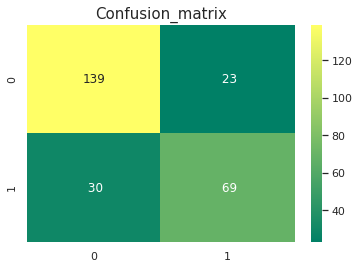

In [512]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=7, learning_rate=1.0, max_depth=5, random_state=0)
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
result_gbc = accuracy_score(y_test, y_pred_gbc)*100
print("Accuracy Model : %.2f%% " % result_gbc)

sns.heatmap(confusion_matrix(y_test,y_pred_gbc),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [560]:
# Parameter tuning

gbc_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

gbc_gs = GridSearchCV(gbc,param_grid = gbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gbc_gs.fit(X_train,y_train)

# Best score
param_gbc_gs = gbc_gs.best_estimator_
result_gbc_gs = gbc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gbc_gs))

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   14.1s
[Parallel(n_jobs=4)]: Done 876 tasks      | elapsed:   29.8s
[Parallel(n_jobs=4)]: Done 1576 tasks      | elapsed:   51.5s
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:  1.1min finished


Accuracy CV : 80.92% 


##### 9. XGBoost

Accuracy Model : 83.14% 


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Text(0.5, 1.05, 'Confusion_matrix')

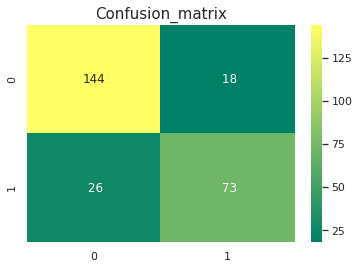

In [515]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
result_xgb = accuracy_score(y_test, y_pred_xgb)*100
print("Accuracy Model : %.2f%% " % result_xgb)

sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [561]:
# Parameter tunning

xgb_param_grid = {'booster' : ['gbtree', 'gblinear', 'dart']
              }

xgb_gs = GridSearchCV(xgb,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

xgb_gs.fit(X_train,y_train)

# Best score
param_xgb_gs = xgb_gs.best_estimator_
result_xgb_gs = xgb_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_xgb_gs))

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Accuracy CV : 82.57% 


[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    1.0s finished


##### 10. AdaBoost

Accuracy Model : 78.16% 


Text(0.5, 1.05, 'Confusion_matrix')

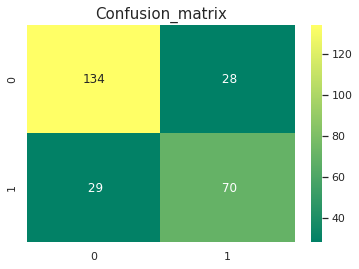

In [520]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
result_ada = accuracy_score(y_test, y_pred_ada)*100
print("Accuracy Model : %.2f%% " % result_ada)

sns.heatmap(confusion_matrix(y_test,y_pred_ada),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [571]:
# Parameter tuning
ada_param_grid = {'n_estimators' : [20, 50, 100, 500, 1000, 2000],
              'learning_rate': [0.1, 0.5, 0.7, 1, 1.2, 1.5],
              'algorithm': ['SAMME', 'SAMME.R']
              }

ada_gs = GridSearchCV(ada,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

ada_gs.fit(X_train,y_train)

# Best score
param_ada_gs = ada_gs.best_estimator_
result_ada_gs = ada_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_ada_gs))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  86 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done 242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 492 tasks      | elapsed:  2.6min


Accuracy CV : 83.55% 


[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  4.3min finished


##### 11. SVM

Accuracy Model : 59.77% 


Text(0.5, 1.05, 'Confusion_matrix')

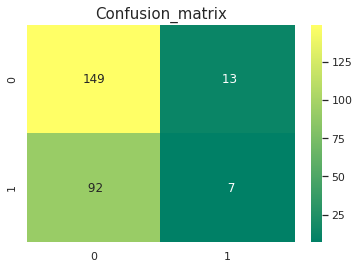

In [774]:
from sklearn import svm

svm = svm.SVC(probability = True) 
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
result_svm = accuracy_score(y_test, y_pred_svm)*100
print("Accuracy Model : %.2f%% " % result_svm)

sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [775]:
# Parameter tuning

svm_param_grid = {'probability': [True],
    'kernel': ['rbf','linear']}

svm_gs = GridSearchCV(svm,param_grid = svm_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

svm_gs.fit(X_train,y_train)

# Best score
param_svm_gs = svm_gs.best_estimator_
result_svm_gs = svm_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_svm_gs))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Done   3 out of  10 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:  4.4min finished


Accuracy CV : 83.06% 


##### 12. Linear Discriminant Analysis

Accuracy Model : 82.76% 


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0.5, 1.05, 'Confusion_matrix')

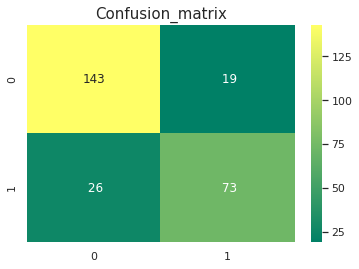

In [528]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda= LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

y_pred_lda=lda.predict(X_test)
result_lda = accuracy_score(y_test, y_pred_lda)*100
print("Accuracy Model : %.2f%% " % result_lda)

sns.heatmap(confusion_matrix(y_test,y_pred_lda),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [563]:
# Parameter tuning

lda_param_grid = {'tol':[0.001,0.01,.1,.2]}

lda_gs = GridSearchCV(lda,param_grid = lda_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
lda_gs.fit(X_train,y_train)

# Best score
param_lda_gs = lda_gs.best_estimator_
result_lda_gs = lda_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_lda_gs))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn

Accuracy CV : 82.89% 


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


##### 13. Quadratic Discriminant Analysis

Accuracy Model : 37.93% 


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Text(0.5, 1.05, 'Confusion_matrix')

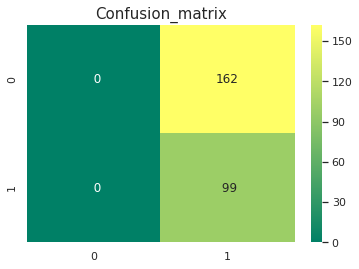

In [782]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda= QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)

y_pred_qda=qda.predict(X_test)
result_qda = accuracy_score(y_test, y_pred_qda)*100
print("Accuracy Model : %.2f%% " % result_qda)

sns.heatmap(confusion_matrix(y_test,y_pred_qda),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [783]:
# Parameter tuning

qda_param_grid = {'tol':[0.001,0.01,.1,.2]}

qda_gs = GridSearchCV(qda,param_grid = qda_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
qda_gs.fit(X_train,y_train)

# Best score
param_qda_gs = qda_gs.best_estimator_
result_qda_gs = qda_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_qda_gs))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminan

Accuracy CV : 41.12% 


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


##### 14. Multi-layer Perceptron

Accuracy Model : 71.26% 


Text(0.5, 1.05, 'Confusion_matrix')

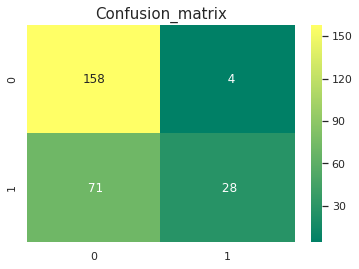

In [784]:
from sklearn.neural_network import MLPClassifier

mlp= MLPClassifier()
mlp.fit(X_train,y_train)

y_pred_mlp=mlp.predict(X_test)
result_mlp = accuracy_score(y_test, y_pred_mlp)*100
print("Accuracy Model : %.2f%% " % result_mlp)

sns.heatmap(confusion_matrix(y_test,y_pred_mlp),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [793]:
# Parameter tuning

mlp_param_grid = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                'solver' :['lbfgs', 'sgd', 'adam'],
                'learning_rate' :['constant', 'invscaling', 'adaptive'],
                'max_iter' : [400]
                 }

mlp_gs = GridSearchCV(mlp,param_grid = mlp_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
mlp_gs.fit(X_train,y_train)

# Best score
param_mlp_gs = mlp_gs.best_estimator_
result_mlp_gs = mlp_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_mlp_gs))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:   27.6s finished


Accuracy CV : 82.40% 


### 6. Overview of the general performance

In [795]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Extra Trees','Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Descent', 'Gradient Boosting', 'Linear Discriminant Analysis', 
              'Decision Tree', 'XGBoost', 'Quadratic Discriminant', 'Multi-Layer Perceptron'],
    'Score': [result_svm, result_knn, result_lr, 
              result_rf, result_extc, result_gnb, result_ada, 
              result_gdc, result_gbc, result_lda, result_dt, result_xgb, result_qda, result_mlp],
    'CV Score': [result_svm_gs, result_knn_gs, result_lr_gs, 
              result_rf_gs, result_extc_gs, result_gnb_gs, result_ada_gs, 
              result_gdc_gs, result_gbc_gs, result_lda_gs, result_dt_gs, result_xgb_gs, result_qda_gs, result_mlp_gs]})
models = models.sort_values(by='CV Score',ascending=False)
models['Diff'] = round((- models['Score'] + models['CV Score']),4)
models

,Model,Score,CV Score,Diff
3,Random Forest,81.226054,84.703947,3.4779
4,Extra Trees,81.226054,84.375000,3.1489
6,AdaBoostClassifier,78.160920,83.552632,5.3917
0,Support Vector Machines,59.770115,83.059211,23.2891
9,Linear Discriminant Analysis,82.758621,82.894737,0.1361
11,XGBoost,83.141762,82.565789,-0.5760
2,Logistic Regression,83.141762,82.401316,-0.7404
13,Multi-Layer Perceptron,71.264368,82.401316,11.1369
5,Naive Bayes,81.609195,81.414474,-0.1947
8,Gradient Boosting,79.693487,80.921053,1.2276


In [573]:
predicted_values = [y_pred_svm, y_pred_knn, y_pred_lr, y_pred_rf, y_pred_gnb, y_pred_ada, y_pred_gdc, y_pred_gbc, y_pred_lda, y_pred_dt, y_pred_xgb]

### 7. Learning curves

In [579]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
            
#g = plot_learning_curve(param_svm_gs,"SVM",X_train,y_train,cv=kfold)

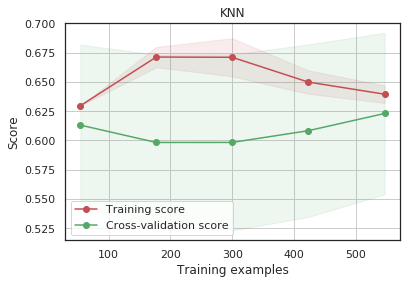

In [580]:
g = plot_learning_curve(param_knn_gs,"KNN",X_train,y_train,cv=kfold)

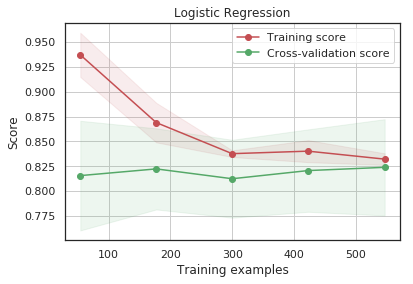

In [581]:
g = plot_learning_curve(param_lr_gs,"Logistic Regression",X_train,y_train,cv=kfold)

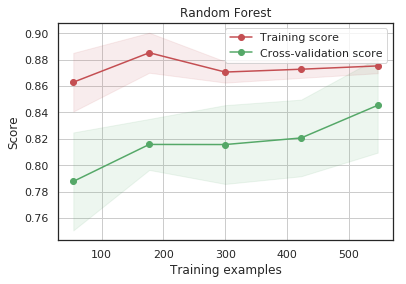

In [582]:
g = plot_learning_curve(param_rf_gs,"Random Forest",X_train,y_train,cv=kfold)

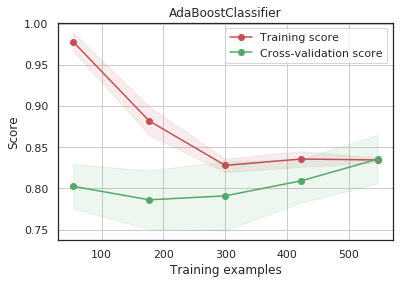

In [583]:
g = plot_learning_curve(param_ada_gs,"AdaBoostClassifier",X_train,y_train,cv=kfold)

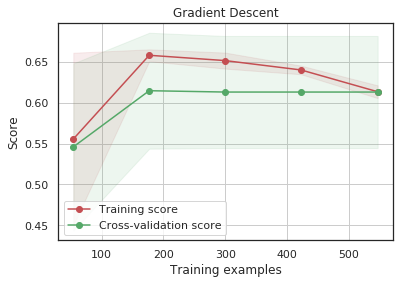

In [584]:
g = plot_learning_curve(param_gdc_gs,"Gradient Descent",X_train,y_train,cv=kfold)

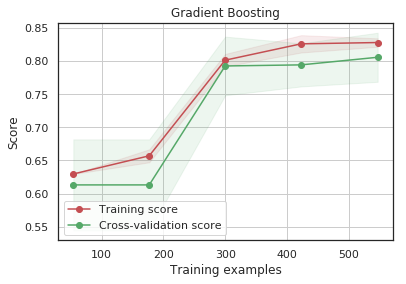

In [585]:
g = plot_learning_curve(param_gbc_gs,"Gradient Boosting",X_train,y_train,cv=kfold)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/anaconda3/lib/python3.6/site-packages/sklearn

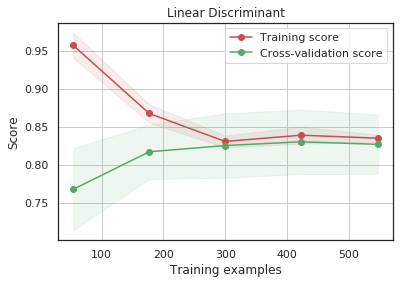

In [586]:
g = plot_learning_curve(param_lda_gs,"Linear Discriminant",X_train,y_train,cv=kfold)

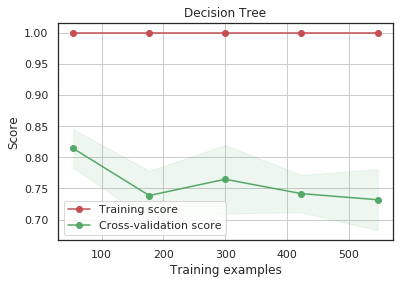

In [587]:
g = plot_learning_curve(param_dt_gs,"Decision Tree",X_train,y_train,cv=kfold)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

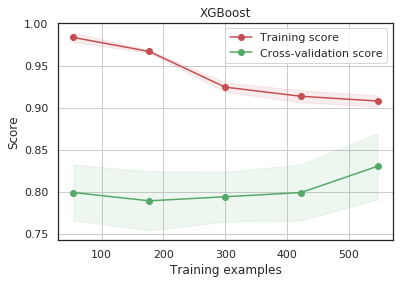

In [588]:
g = plot_learning_curve(param_xgb_gs,"XGBoost",X_train,y_train,cv=kfold)

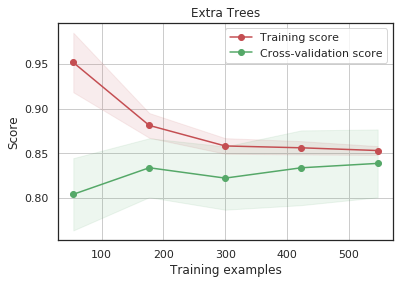

In [763]:
g = plot_learning_curve(param_extc_gs,"Extra Trees",X_train,y_train,cv=kfold)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminan

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:706: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/anaconda3/lib/python3.6/site-packages

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/anaconda3/lib/python3.6/site-packages/sklearn/discriminan

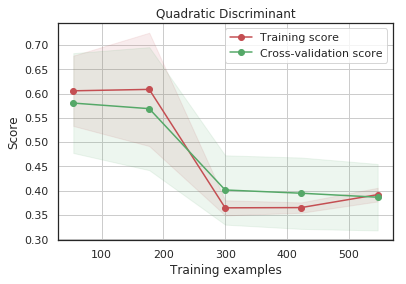

In [791]:
g = plot_learning_curve(param_qda_gs,"Quadratic Discriminant",X_train,y_train,cv=kfold)

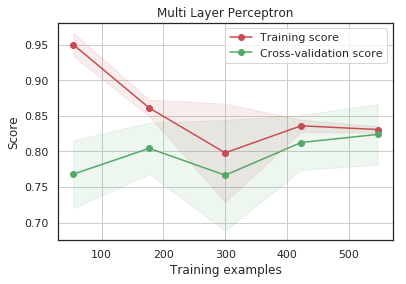

In [796]:
g = plot_learning_curve(param_mlp_gs,"Multi Layer Perceptron",X_train,y_train,cv=kfold)

### 8. Ensemble learning

In [589]:
best_model = []
for m in predicted_values :
    if accuracy_score(y_test, m) > 0.7 :
        best_model.append(m)

##### 1. Model Ensemble

In [ ]:
import statistics as stat
final_pred_mode = np.array([])
final_pred_test = np.array([])

predicted_values = [y_pred_svm, y_pred_extc, y_pred_knn, y_pred_lr, y_pred_rf, y_pred_gnb, y_pred_ada, y_pred_gdc, y_pred_gbc, y_pred_lda, y_pred_dt, y_pred_xgb]

for i in range(0,len(X_test)):
    final_pred_mode = np.append(final_pred_mode, stat.mode([y_pred_svm[i], y_pred_knn[i], y_pred_lr[i], y_pred_rf[i], y_pred_gnb[i], y_pred_ada[i], y_pred_gdc[i], y_pred_gbc[i], y_pred_lda[i],y_pred_dt[i], y_pred_xgb[i] ]))
    
for i in range(0,len(test)):    
    final_pred_test = np.append(final_pred_test, stat.mode([y_pred_svm[i], y_pred_knn[i], y_pred_lr[i], y_pred_rf[i], y_pred_gnb[i], y_pred_ada[i], y_pred_gdc[i], y_pred_gbc[i], y_pred_lda[i],y_pred_dt[i], y_pred_xgb[i] ]))

print("Ensemble Accuracy : " + str(accuracy_score(y_test, final_pred_mode)))

#y_pred_svm, y_pred_knn, y_pred_lr, y_pred_rf, y_pred_gnb, y_pred_ada, y_pred_gdc, y_pred_gbc, y_pred_lda, y_pred_dt, y_pred_xgb

##### 2. Average Ensemble

In [602]:
final_pred_avg = (sum(predicted_values)/len(predicted_values)).round()
print("Ensemble Accuracy : " + str(accuracy_score(y_test, final_pred_avg)))

Ensemble Accuracy : 0.8199233716475096


##### 3. Voting Classifier

In [802]:
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('rf_gs', param_rf_gs), ('extc_gs', param_extc_gs),
 ('ada_gs',param_ada_gs),('svm_gs',param_svm_gs)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) #k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]

classifiers=['Logistic Regression','Random Forest','GradientBoosting']
models=[GaussianNB(), LogisticRegression(),RandomForestClassifier(n_estimators=100),GradientBoostingClassifier(n_estimators=7,learning_rate=1.1)]
for i in models:
    model = i
    cv_result = cross_val_score(model,predictors,target, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

In [750]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title',
       'Title_Honor', 'Title_Master', 'Title_Millitary', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Fsize'],
      dtype='object')

### 9. Submission

In [803]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

IDtest = test["PassengerId"]

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("ensemble_python_voting.csv",index=False)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
